In [1]:
from pager import PageModel, PageModelUnit
from pager.page_model.sub_models import ImageModel, WordsAndStylesModel, SpGraph4NModel
from pager.page_model.sub_models import ImageToWordsAndStyles,  WordsAndStylesToSpGraph4N

import matplotlib.pyplot as plt
import numpy as np

In [2]:
page = PageModel([
    PageModelUnit(id="image", sub_model=ImageModel(), converters={}, extractors=[]),
    PageModelUnit(id="word_and_style", sub_model=WordsAndStylesModel(), converters={"image": ImageToWordsAndStyles()}, extractors=[]),
    PageModelUnit(id="sp_graph", sub_model=SpGraph4NModel(), converters={"word_and_style": WordsAndStylesToSpGraph4N()}, extractors=[]),
])

In [3]:
page.read_from_file("/home/daniil/project/page.png")

In [4]:
page.extract()

In [5]:
import json
graph = page.to_dict()

In [6]:
with open("claster.json", "r") as f:
    clus = json.load(f)
clus = np.array(clus["clus"]) 

# with open("claster.json", "w") as f:
#     json.dump({"clus": word_cluster}, f)
# clus = np.array(clus["clus"]) 

In [ ]:
edges_exist = np.zeros_like(graph["A"][0])
for i, ed in enumerate(np.transpose(graph["A"])):
    for k in range(1, 11):
        
        if clus[ed[0]] == clus[ed[1]]:
            edges_exist[i] = 1

In [ ]:
graph["edges_exist"] = edges_exist.tolist()

In [ ]:
with open("graph.json", "w") as f:
    json.dump(graph, f)


In [ ]:
page.page_units[1].sub_model.styles[0].to_dict(is_vec=True)

In [57]:
from random import randint
colors = []
for i in range(15):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

In [58]:
words = page.page_units[1].sub_model.words
label = np.array([w.style_id for w in words])

(800.0, 0.0)

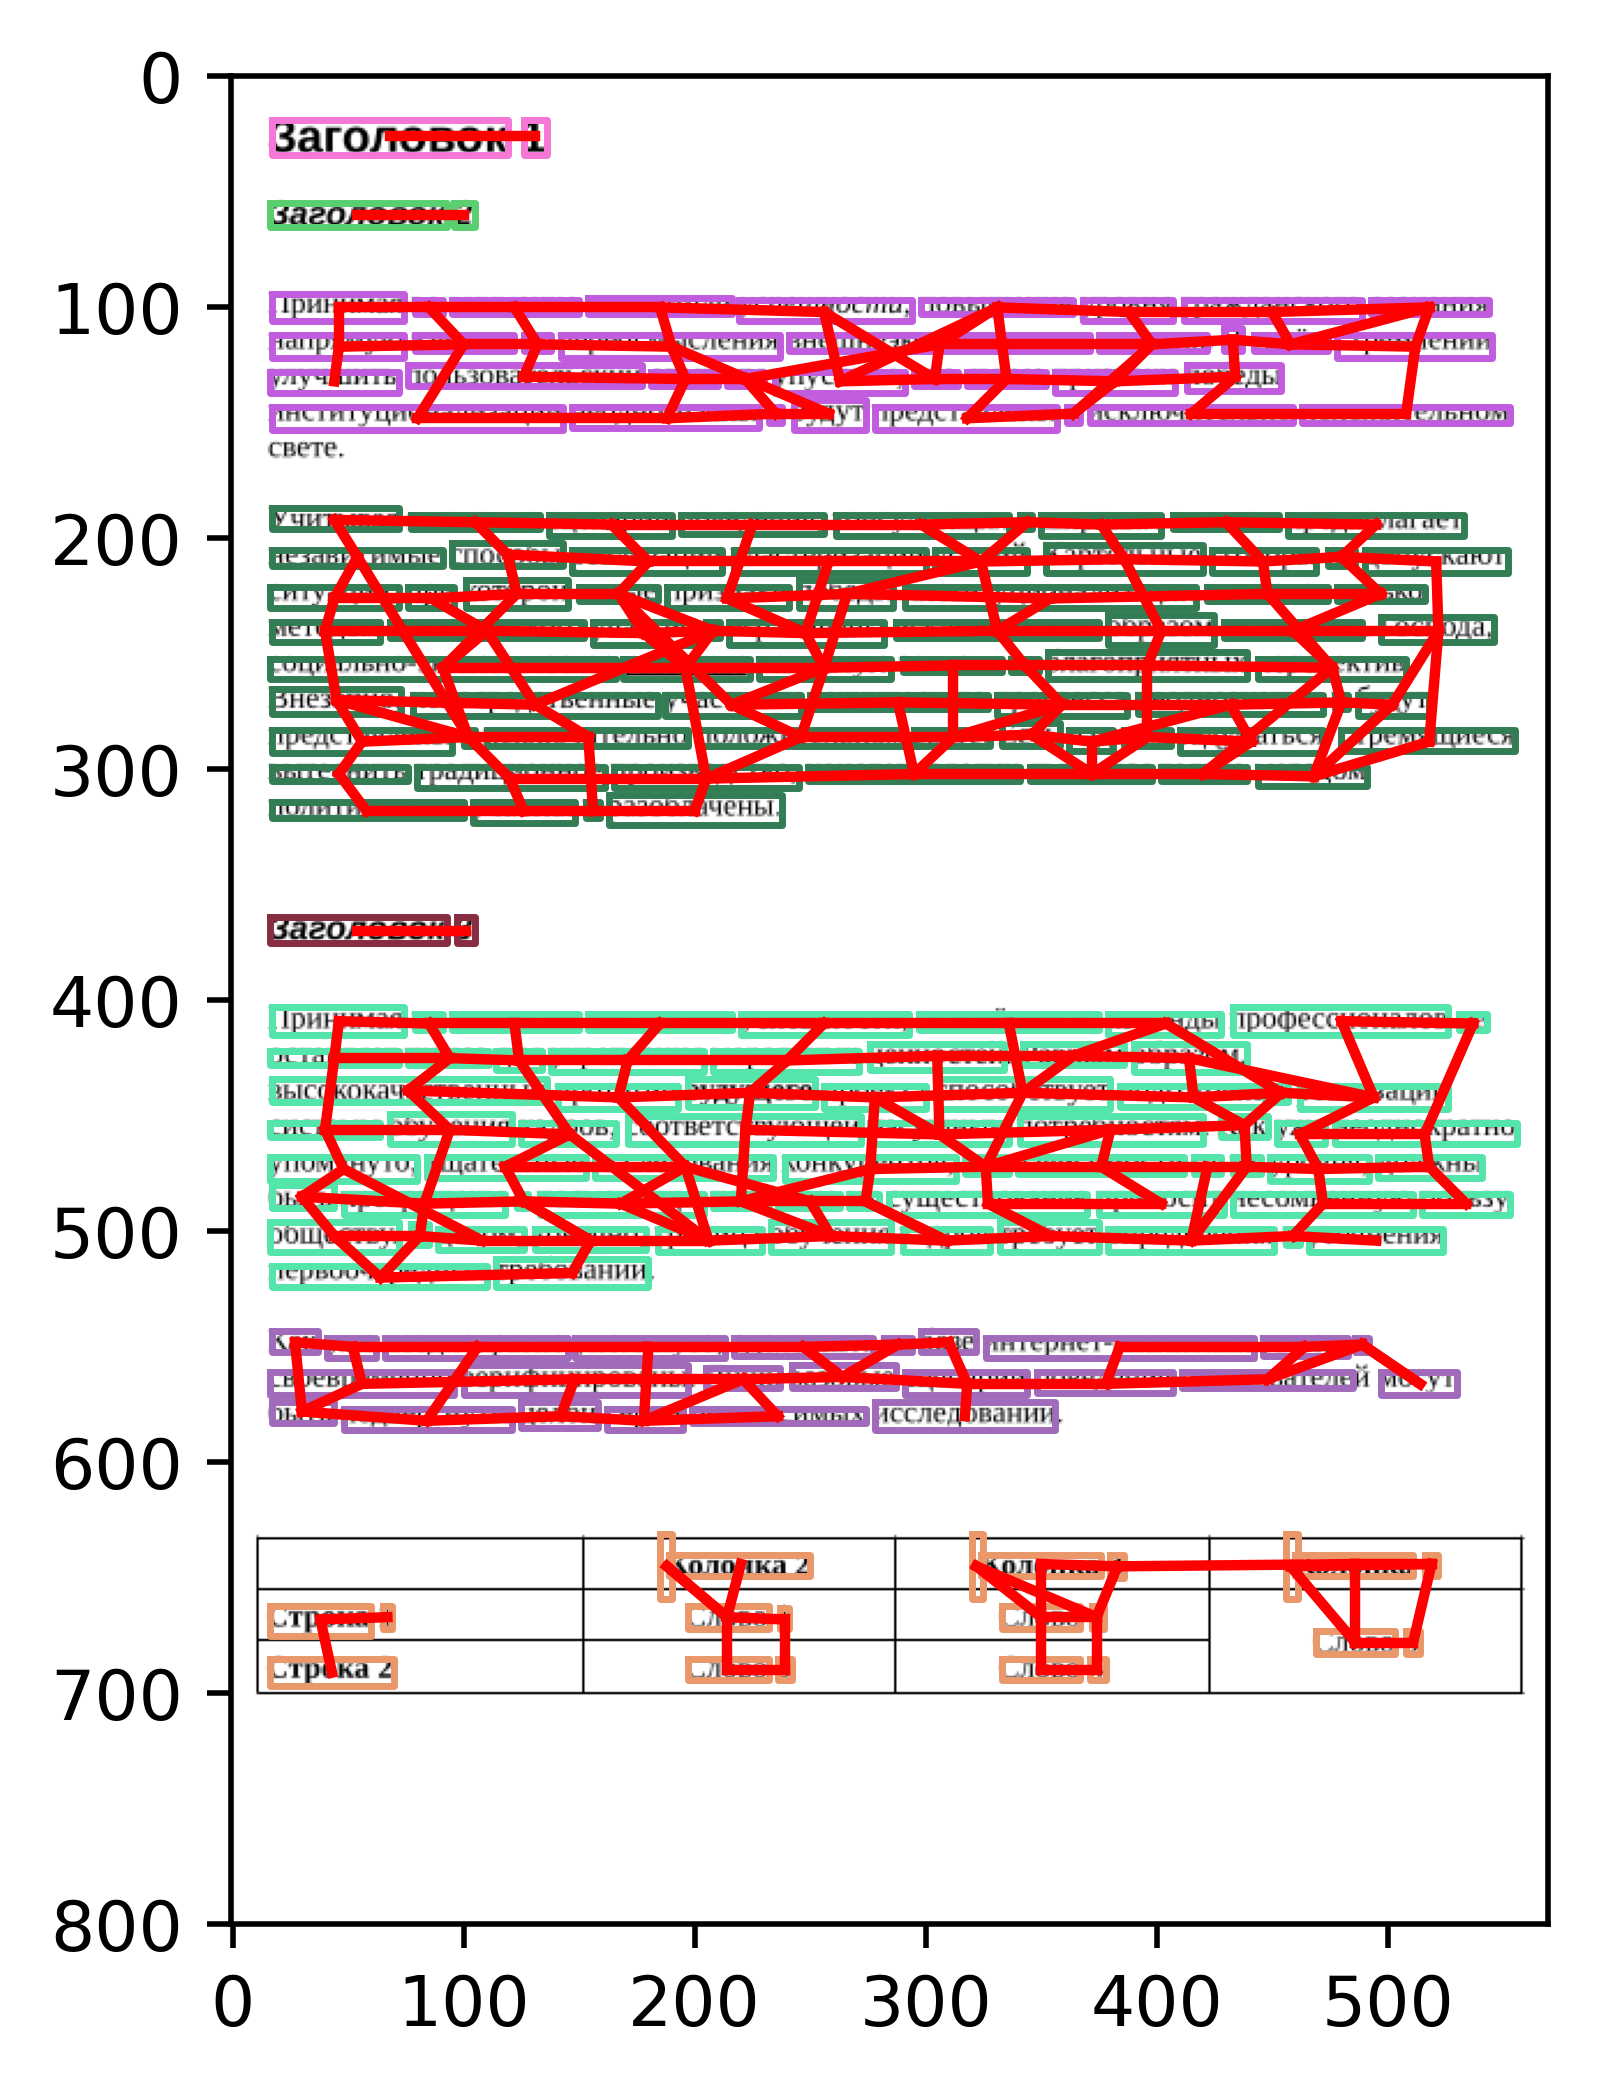

In [59]:
plt.figure(dpi=500)
for i, word in enumerate(words):
    word.segment.plot(color=colors[clus[i]])

plt.imshow(page.page_units[0].sub_model.img)
for ind, ed in zip(edges_exist, np.transpose(graph["A"]) ) :
    if ind == 1:
        x1, y1 = words[ed[0]].segment.get_center()
        x2, y2 = words[ed[1]].segment.get_center()
        plt.plot([x1, x2], [y1, y2], color="r")
# lines = [
#     50, 90, 180, 350, 390, 540, 600, 800
# ]

# line_tmp = lines[0]

# word_cluster = []
# for word in words:
#     y = word.segment.get_center()[1]
#     ok = True
#     for i, h in enumerate(zip(lines[:-1], lines[1:])):
#         h0, h1 = h
#         if y > h0 and y < h1:
#             word_cluster.append(i)
#             ok = False
#     if ok:
#         word_cluster.append(-1)
    


plt.ylim([800, 0])

0


(800.0, 0.0)

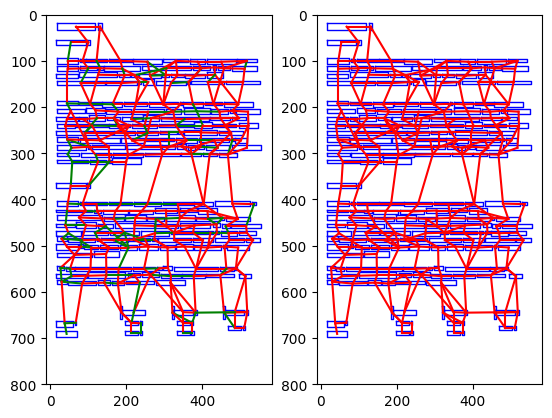

In [65]:
with open("graph_rez.json", "r") as f:
    h = json.load(f)
h = np.array(h["h"])
plt.subplot(1, 2, 1)
for i, word in enumerate(words):  
    word.segment.plot()

del_edges = 0
for ind, ed in zip(h, np.transpose(graph["A"]) ) :
    if ind > 0.9999:
        x1, y1 = words[ed[0]].segment.get_center()
        x2, y2 = words[ed[1]].segment.get_center()
        plt.plot([x1, x2], [y1, y2], color="g")
    else:
        x1, y1 = words[ed[0]].segment.get_center()
        x2, y2 = words[ed[1]].segment.get_center()
        plt.plot([x1, x2], [y1, y2], color="r")
print(del_edges)
plt.ylim([800, 0])

plt.subplot(1, 2, 2)
for i, word in enumerate(words):  
    word.segment.plot()


for ind, ed in zip(edges_exist, np.transpose(graph["A"]) ) :
    x1, y1 = words[ed[0]].segment.get_center()
    x2, y2 = words[ed[1]].segment.get_center()
    plt.plot([x1, x2], [y1, y2], color="r")
plt.ylim([800, 0])

In [59]:
h

array([-5.96046448e-08,  1.01327896e-06,  1.35868788e-04, ...,
        0.00000000e+00, -5.96046448e-08, -5.96046448e-08])

In [69]:
words[0].style_id

In [71]:
styles = page.page_units[1].sub_model.styles

In [73]:
[styles[w.style_id].to_dict() for w in words]

[{'id': 0,
  'size': 14,
  'font_type': 'CAAKMM+NimbusRomNo9L-Medi',
  'italic': False,
  'width': 0.0,
  'color': [0, 0, 0],
  'label': 0},
 {'id': 0,
  'size': 14,
  'font_type': 'CAAKMM+NimbusRomNo9L-Medi',
  'italic': False,
  'width': 0.0,
  'color': [0, 0, 0],
  'label': 0},
 {'id': 0,
  'size': 14,
  'font_type': 'CAAKMM+NimbusRomNo9L-Medi',
  'italic': False,
  'width': 0.0,
  'color': [0, 0, 0],
  'label': 0},
 {'id': 0,
  'size': 14,
  'font_type': 'CAAKMM+NimbusRomNo9L-Medi',
  'italic': False,
  'width': 0.0,
  'color': [0, 0, 0],
  'label': 0},
 {'id': 0,
  'size': 14,
  'font_type': 'CAAKMM+NimbusRomNo9L-Medi',
  'italic': False,
  'width': 0.0,
  'color': [0, 0, 0],
  'label': 0},
 {'id': 0,
  'size': 14,
  'font_type': 'CAAKMM+NimbusRomNo9L-Medi',
  'italic': False,
  'width': 0.0,
  'color': [0, 0, 0],
  'label': 0},
 {'id': 0,
  'size': 14,
  'font_type': 'CAAKMM+NimbusRomNo9L-Medi',
  'italic': False,
  'width': 0.0,
  'color': [0, 0, 0],
  'label': 0},
 {'id': 0,
  

In [49]:

page.extract()

In [50]:
import json
graph = page.to_dict()
with open("graph.json", "w") as f:
    json.dump(graph, f)


(800.0, 0.0)

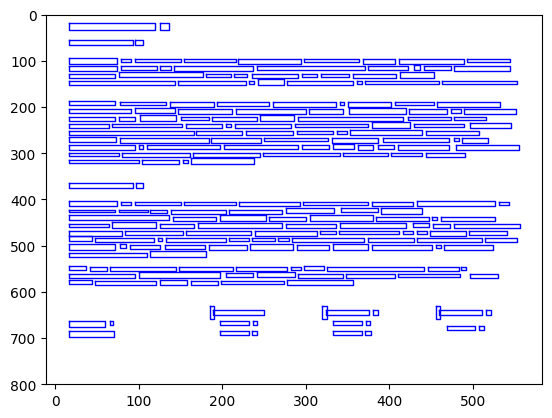

In [51]:
words = page.page_units[1].sub_model.words
for i, word in enumerate(words):
    if left_ <=  i and i < right_: 
        word.segment.plot(color="r")
    else:
        word.segment.plot()

plt.ylim([800, 0])